In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#merge
mouse_study = pd.merge(mouse_metadata,study_results, on= 'Mouse ID')
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = len(mouse_study['Mouse ID'].unique())
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study = mouse_study[mouse_study["Mouse ID"].isin(duplicate_mouse_ids)==False]
cleaned_mouse_study


cleaned_mouse_study["Mouse ID"].nunique()

cleaned_mouse_df = cleaned_mouse_study
cleaned_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = len(cleaned_mouse_df['Mouse ID'].unique())
mice_count2

248

In [7]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
#Using groupby & summary statistical methods to calculate for each drug regimen 
summary_stats = pd.DataFrame(cleaned_mouse_df.groupby("Drug Regimen").count())

summary_stats.head()



,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [8]:
#Groupby functioning used to group by drug regimen
summary_stats['Mean'] = cleaned_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_stats['Median'] = cleaned_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_stats['Variance'] = cleaned_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_stats['Standard Deviation'] = cleaned_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_stats['SEM'] = cleaned_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = summary_stats[["Mouse ID", "Mean", "Median", "Variance", "Standard Deviation", "SEM"]]
summary_stats.head()

,Mouse ID,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466


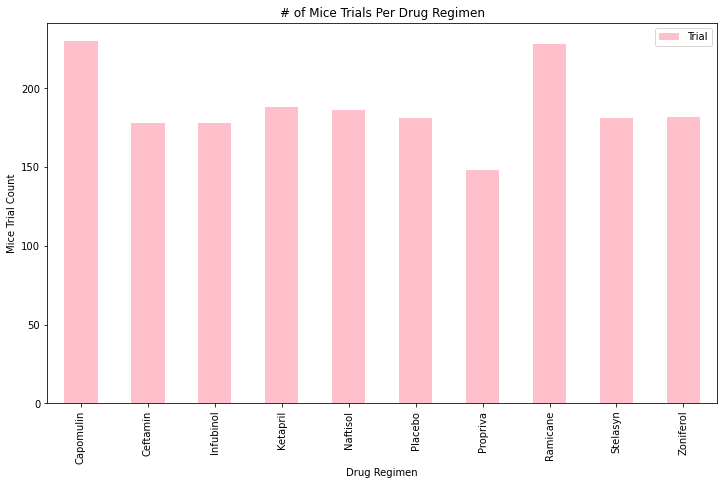

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

        # Setting up new data frame that counts & groups cleaned_mouse dataframe by 'Drug Regimen'
barplot_df = pd.DataFrame(cleaned_mouse_df.groupby(["Drug Regimen"]).count()).reset_index()

        # Isolate the columns in the the DataFrame, the drug regimens for each mouse ID
drugregimen_data = cleaned_mouse_df[["Drug Regimen","Mouse ID"]]


        # Define data for bar plot so "Drug Regimen" is x-axis label
datapoints = summary_stats[['Mouse ID']]
datapoints = datapoints.rename(columns = {"Mouse ID" : "Trial"})

        # Define bar chart information
datapoints.plot(kind="bar", figsize=(12,7), color = "pink")

plt.title("# of Mice Trials Per Drug Regimen")

plt.ylabel("Mice Trial Count")
plt.show()

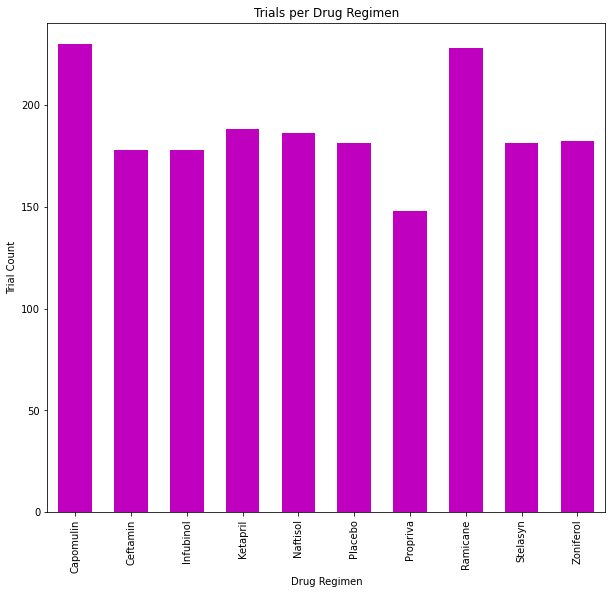

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

        # Define DataFrame; how the total of mice for every treatment (just like bar graph)

        # Make "Drug Regimen" the x-axis label
datapoints = summary_stats[["Mouse ID"]]
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Define where to write x label and set chart size
plt.figure(figsize=(10,9))
plt.bar(x_axis, datapoints["Mouse ID"], color="m", width = .6)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-.5, len(x_axis)-.5)
plt.ylim(0, max(datapoints["Mouse ID"])+10)
datapoints = datapoints.rename(columns = {"Mouse ID" : "Trial"})

# Set title and labels
plt.title("Trials per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Trial Count")

# Save and display graph
plt.show()


<AxesSubplot:ylabel='Sex'>

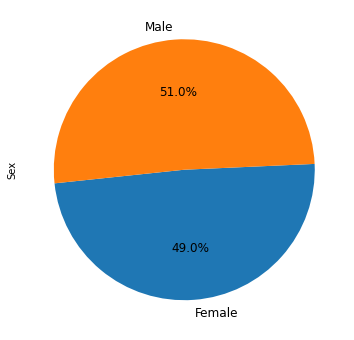

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = cleaned_mouse_df.groupby('Sex')
gender_qty = gender["Sex"].count()

# Create pie plot with data
plt.figure(figsize=(10,6))
ax1 = plt.subplot(111, aspect = 'equal')
gender_qty.plot(kind='pie', y = "Quantity", ax=ax1, autopct = '%1.1f%%',
              startangle = 186, shadow = False, legend = False, fontsize = 12)


<ipython-input-12-3c0be46bb95a>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  counts = np.array(gender)


ValueError: could not convert string to float: 's185'

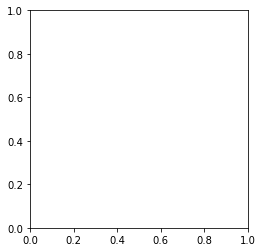

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Pie Plot created with PyPlot
# Distribution of Male vs Female Mice


#Labels sections of the pie plot
labels = ["Male", "Female"]

# Define colors of each section of pie plot
colors = ["lightskyblue", "pink"]

# Define counts
counts = np.array(gender)

# Define each section
explode = (0.1, 0)

# Direct matplotlib to create a pie chart based upon the above data
plt.pie(gender, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 364)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice")

# Display pie plot
plt.show()



In [13]:
####   Quartiles, Outliers, and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
    # Make DataFrames of for all drug regimens
capomulin2_df = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == "Ceftamin", :]

    # Ramicane - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_max)


    # Merge new data to dataframe
ramicane_merge = pd.merge(ramicane_vol, cleaned_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge.head()

    # Ramicane - Calculate the final tumor volume with drug regimen Ramicane
tumor_ramicane = ramicane_merge["Tumor Volume (mm3)"]

    # Define quartiles, IQR, lowerq and upperq
quartiles = tumor_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Ramicane regimen, the following information was found:")
print("-----------------------------------------------------------")
print(f"The upper quartile of the tumor volume is: {upperq}.")
print(f"The lower quartile of the tumor volume is: {lowerq}.")
print(f"The interquartile range of the tumor volume is: {iqr}.")
print(f"The median of the tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"There is a high likelihood that values above {upper_bound} are outliers.") 
print(f"There is a high likelihood that values below {lower_bound} are outliers.")

# Capomulin - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
capomulin_max = capomulin2_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_max)

# Merge new data to dataframe
capomulin_merge = pd.merge(capomulin_vol, cleaned_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head()

# Calculate the final tumor volume
tumor_capomulin = capomulin_merge["Tumor Volume (mm3)"]



For Ramicane regimen, the following information was found:
-----------------------------------------------------------
The upper quartile of the tumor volume is: 40.65900627.
The lower quartile of the tumor volume is: 31.56046955.
The interquartile range of the tumor volume is: 9.098536719999998.
The median of the tumor volume is: 36.56165229.
There is a high likelihood that values above 54.30681135 are outliers.
There is a high likelihood that values below 17.912664470000003 are outliers.


In [14]:
 # Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    
# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Capomulin regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")
print("")
print("")
print("---------------------------------------------")

# Infubinol - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_max)

# Merge new data to dataframe
infubinol_merge = pd.merge(infubinol_vol, cleaned_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
infubinol_merge.head()

# Infubinol - Calculate the final tumor volume with drug regimen Infubinol
tumor_infubinol = infubinol_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Infubinol regimen, the following information was found:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"There is a high likelihood that values above {upper_bound} are outliers.") 
print(f"There is a high likelihood that values below {lower_bound} are outliers.")
print("")
print("")
print("---------------------------------------------")

# Ceftamin - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_max)

# Merge new data to dataframe
ceftamin_merge = pd.merge(ceftamin_vol, cleaned_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge.head()

# Ceftamin - Calculate the tumor volume with drug regimen
tumor_ceftamin = ceftamin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Ceftamin regimen, the following information was found:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"There is a high likelihood that values above {upper_bound} are outliers.") 
print(f"There is a high likelihood that values below {lower_bound} are outliers.")


    

For Capomulin regimen, please note the following:
The upper quartile of tumor volume is: 40.1592203.
The lower quartile of tumor volume is: 32.37735684.
The interquartile range of tumor volme is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values above 51.83201549 could be outliers.
Values below 20.70456164999999 could be outliers.


---------------------------------------------
For Infubinol regimen, the following information was found:
The upper quartile of tumor volume is: 65.52574285.
The lower quartile of tumor volume is: 54.04860769.
The interquartile range of tumor volme is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
There is a high likelihood that values above 82.74144559000001 are outliers.
There is a high likelihood that values below 36.83290494999999 are outliers.


---------------------------------------------
For Ceftamin regimen, the following information was found:
The upper quartile of tumor volume is: 64.29983003.
The lower quarti

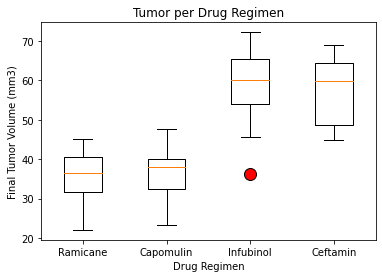

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest    
data_to_plot = [tumor_ramicane, tumor_capomulin, tumor_infubinol, tumor_ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor per Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

outlier_dot = dict(markerfacecolor='red',markersize=12)

ax1.boxplot(data_to_plot, labels=["Ramicane","Capomulin","Infubinol","Ceftamin",],flierprops=outlier_dot)

plt.savefig('boxplot')
plt.show()

## Line Plot of Time Point vs Tumor Volume 
#Mouse s185 treated with Capomulin

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Isolate Capomulin Drug Regimen
capomulin_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

# Isolate data of a single mouse (s185)
# Remember loc -> slicing by names!
capomulin_s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_s185_df.head()

# Isolate columns of single mouse (s185)
capomulin_s185_df = capomulin_s185_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]

# Set the index of capomulin_s185_df
capomulin_s185_df = capomulin_s185_df.reset_index(drop=True)



Text(0.5, 1.0, 'Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment')

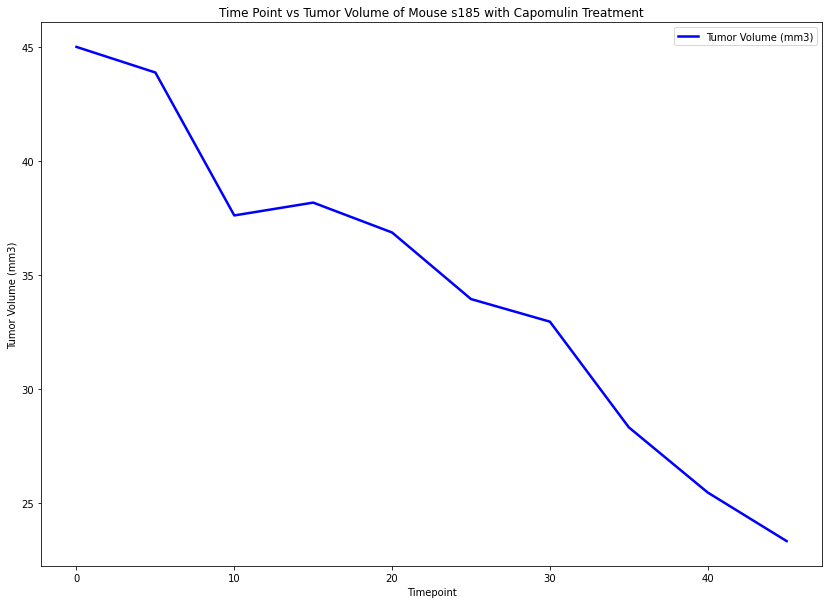

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
    # Generate a line plot of time point versus tumor volume for a mouse (s185) treated with Capomulin
capomulin_s185_df.set_index('Timepoint').plot(figsize=(14,10), linewidth=2.5, color='blue')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment")



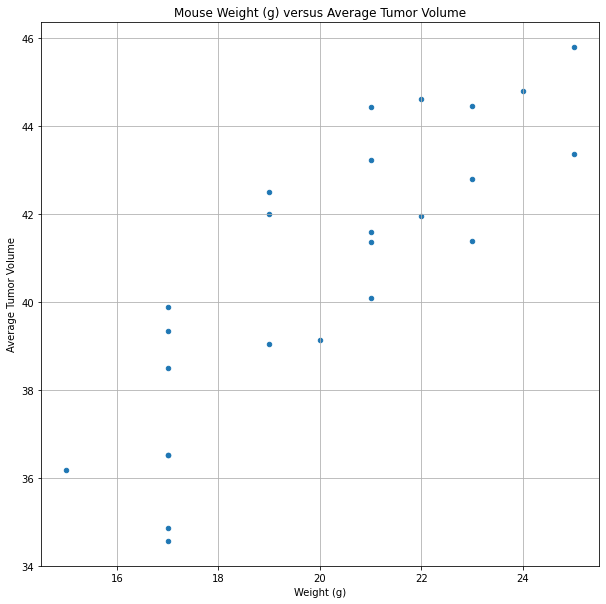

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
    ## Scatter Plot of Mouse Weight vs Average Tumor Volume 
#Drug Regimen is Capomulin
# Isolate Capomulin Drug Regimen data from above
capomulin_df.head()

# Isolate columns of Capomulin
capomulin_filtered_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_filtered_df.head()

# Calculate the average tumor volume per mouse and weight with drug regimen = Capomulin
capomulin_mean = pd.DataFrame(capomulin_filtered_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename tumor volume column to Average Tumor Volume
capomulin_mean = capomulin_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_mean.head()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mean = capomulin_mean.set_index('Mouse ID')

capomulin_mean.plot(kind = "scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(10,10), 
                    title="Mouse Weight (g) versus Average Tumor Volume")
plt.show()




The correlation between mouse weight and average tumor volume is 0.84.


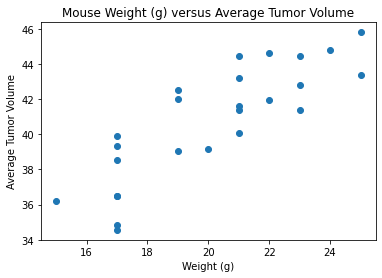

Predicted y is 42.54983369121531 vs an actual value of 41.963635634
The r-squared is: 0.7088568047708721


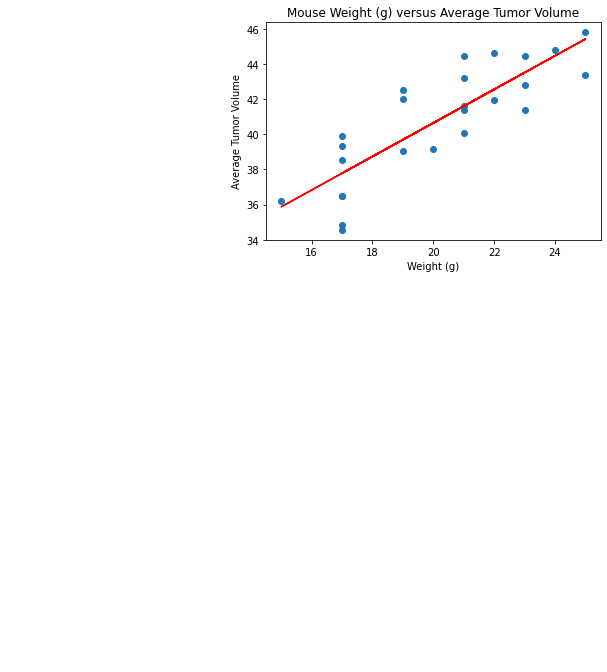

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
            ## Correlation Coefficient & Regression Model for Mouse Weight and Average Tumor Volume
#Drug Regimen is Capomulin

# Remember! slice by index  | df.iloc[,0] 
# Define dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Isolate mouse weight and average tumor volume
mouse_weight = capomulin_mean.iloc[:,0]
average_tumor_volume = capomulin_mean.iloc[:,1]

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

# Create beginning steps for linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
plt.show()

# Add the linear regression equation and line to plot
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Check x values
x_values

# y=mx+b
y=slope*x_values[0]+intercept
print(f'Predicted y is {y} vs an actual value of {y_values[0]}')

# Calculate regress values, r-squared, etc
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()

